In [4]:
import h5py
import psana
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import  rotate
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit,minimize
import multiprocessing
import os
from functools import partial
import time
import sys
import argparse
from datetime import datetime
import tempfile
import XSpect.XSpect_Analysis
import XSpect.XSpect_Controller
import XSpect.XSpect_Visualization

### Viewing Static XES Spectra

In [62]:
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(hutch='mfx',experiment_id='mfx100894224',lcls_run=24)
xes=XSpect.XSpect_Controller.XESBatchAnalysisRotation()
keys=['tt/fltpos_ps','epics/lxt', 'scan/mfx_lxt_fast1' , 'MfxDg2BmMon/totalIntensityJoules','tt/ampl'] 
#keys=['tt/fltpos_ps','epics/lxt', 'scan/lxt' , 'MfxDg2BmMon/totalIntensityJoules','tt/ampl'] 
names=['time_tool_correction','lxt_ttc', 'encoder','ipm', 'time_tool_ampl']
#Here we define the epix detector keys separately as they are imported separately to avoid OOM
xes.key_epix=['epix100/ROI_area']
xes.friendly_name_epix=['epix']
##
xes.set_key_aliases(keys,names)
#xes.end_index=5000
# xes.mintime=-87E-12
# xes.maxtime=-85E-12

# xes.mintime=-5.0E-12
# xes.maxtime=5.0E-12

xes.mintime=-2
xes.maxtime=5

xes.numpoints=50
xes.time_bins=np.linspace(xes.mintime,xes.maxtime,xes.numpoints)
#xes.rois=[[0,50]]
xes.adu_cutoff=3.0
#xes.angle=90
xes.lxt_key=None
xes.transpose=False
#xes.add_filter('xray','ipm4',1.0E3)
# xes.add_filter('simultaneous','ipm4',1.0E3)
# xes.add_filter('simultaneous','time_tool_ampl',0.05)
#xes.run_parser(['23'])
xes.run_parser(['74'])

In [63]:
#start=time.time()
xes.primary_analysis_parallel_range(8,xes_experiment,increment=500,verbose=False)
#end=time.time()

Processing: 100%|██████████| 48/48 [00:03<00:00, 13.08Shot_Batch/s]


Text(0.5, 1.0, 'Runs: [74]')

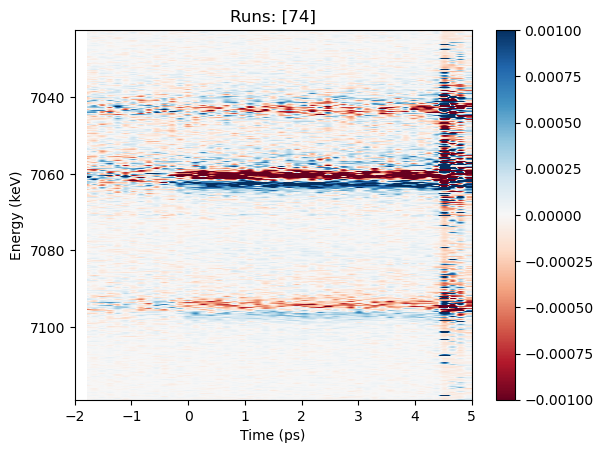

In [64]:
v=XSpect.XSpect_Visualization.XESVisualization()
v.combine_spectra(xes_analysis=xes,xes_key='epix_xray_not_laser_time_binned_ROI_1',
                  xes_laser_key='epix_simultaneous_laser_time_binned_ROI_1')
                  #dark_cutoff=10)
v.vmin=-0.001
v.vmax=0.001
v.plot_2d_difference_spectrum(xes)
plt.title("Runs: " + str(xes.runs))
#plt.xlim(-0.8,0.8)
#print('Run 23 Laser on shots - Laser off shots')

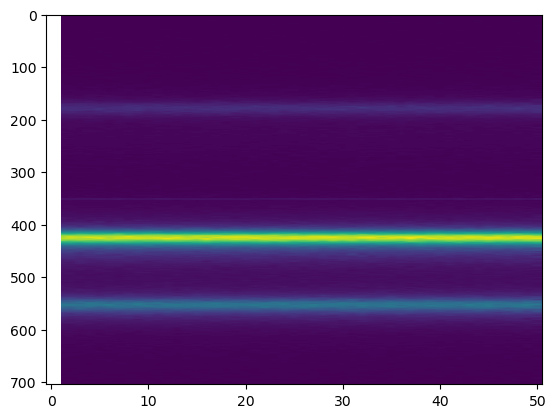

In [65]:
plt.imshow(xes.summed_laser_off_normalized.T, aspect="auto")

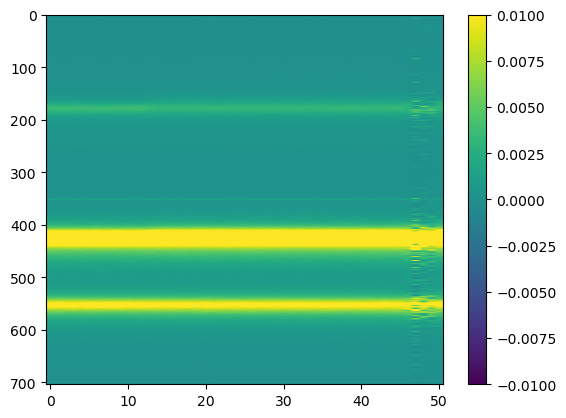

In [77]:
plt.imshow(xes.summed_laser_on_normalized.T, aspect="auto")
plt.clim(-0.01, 0.01)
plt.colorbar()

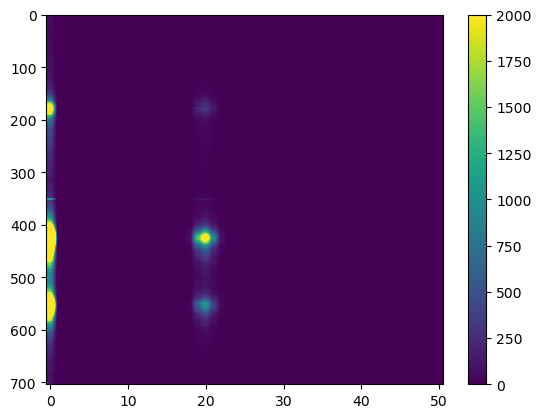

In [67]:
plt.imshow(xes.analyzed_runs[0].epix_simultaneous_laser_time_binned_ROI_1.T, aspect="auto")
plt.clim(0,2000)
plt.colorbar()

In [68]:
len(xes.analyzed_runs)

48

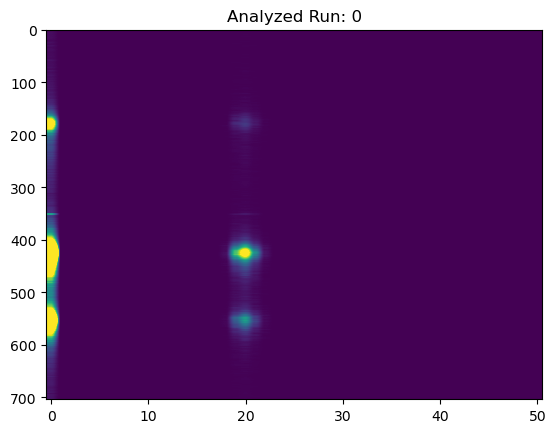

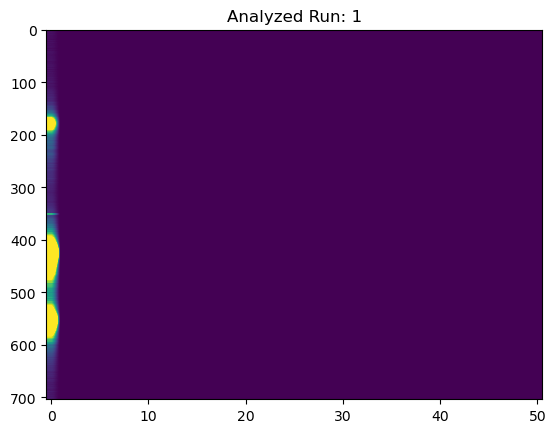

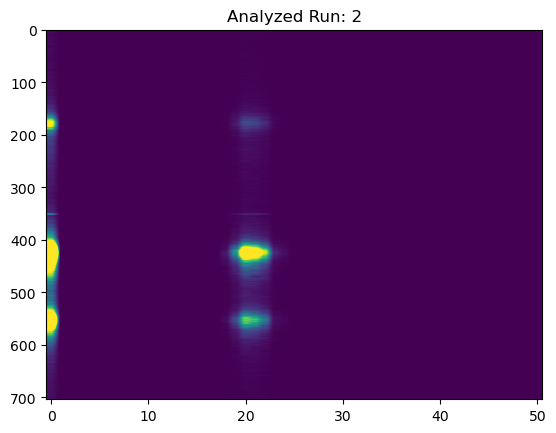

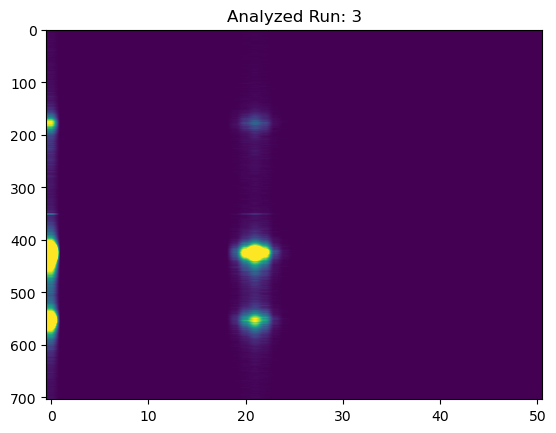

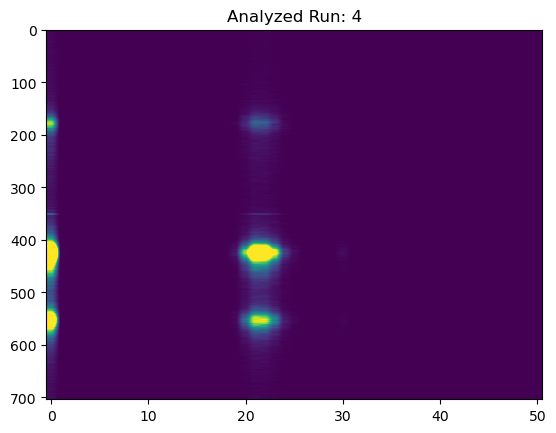

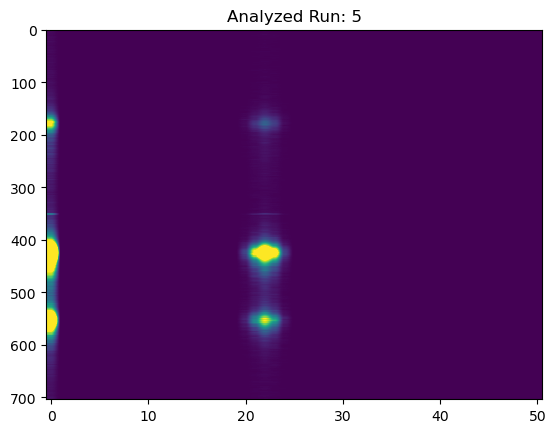

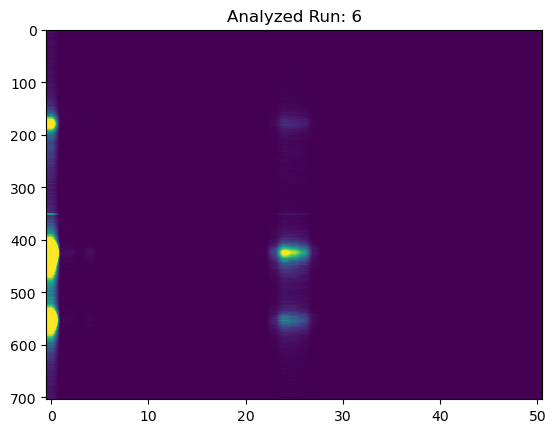

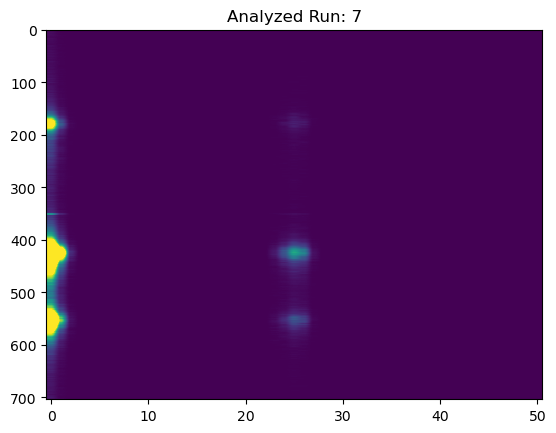

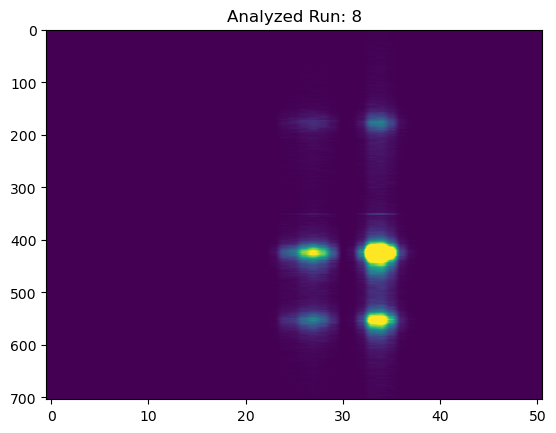

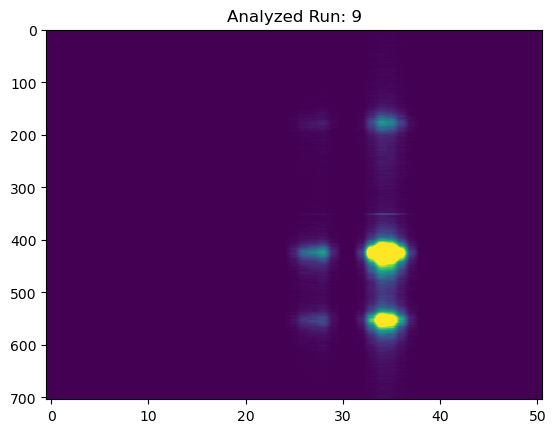

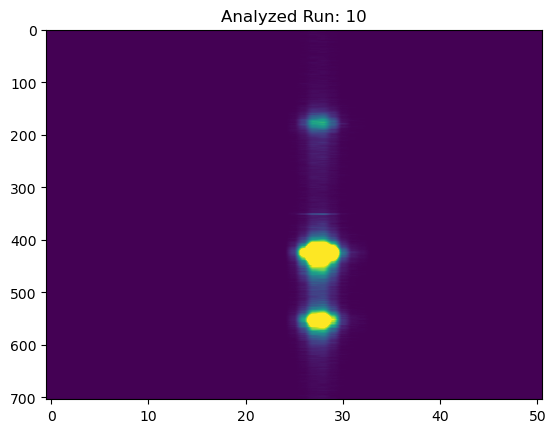

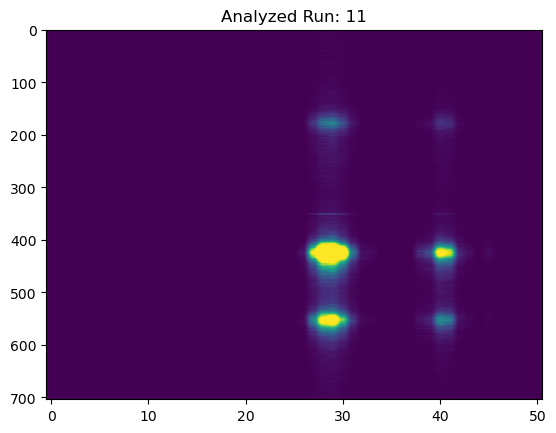

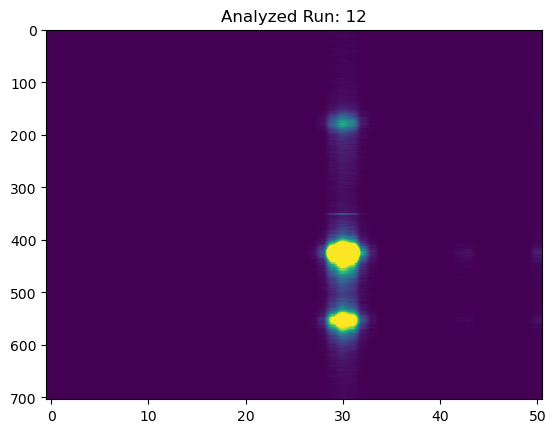

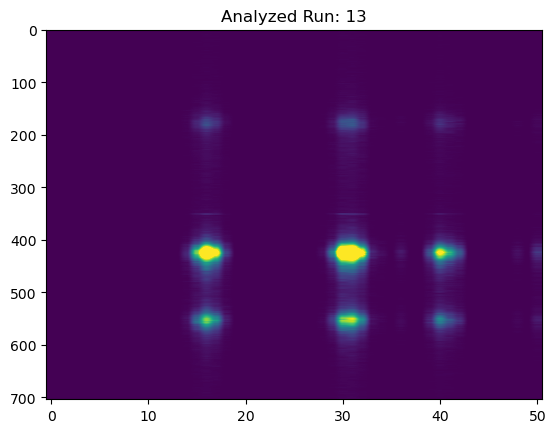

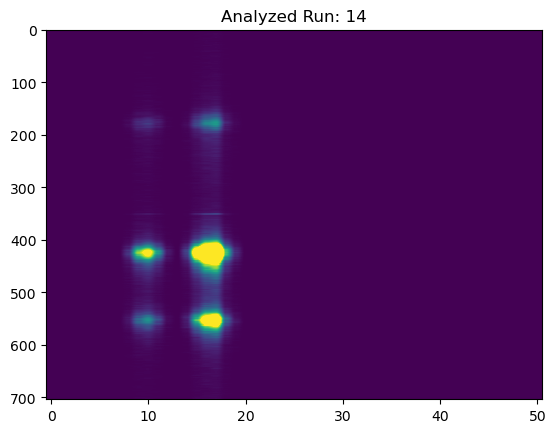

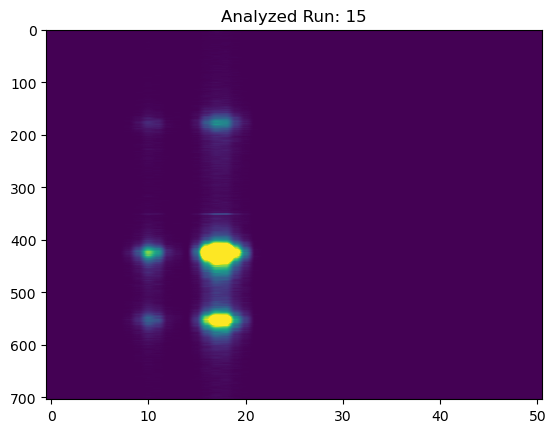

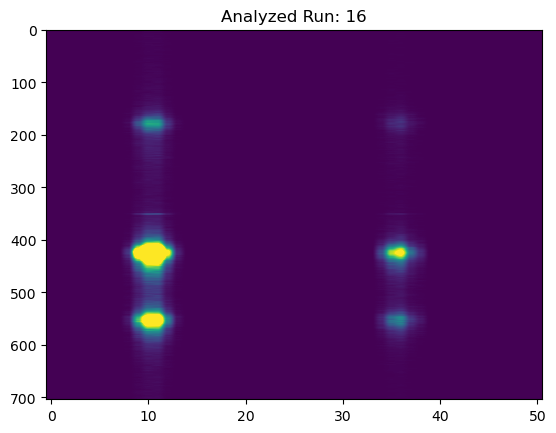

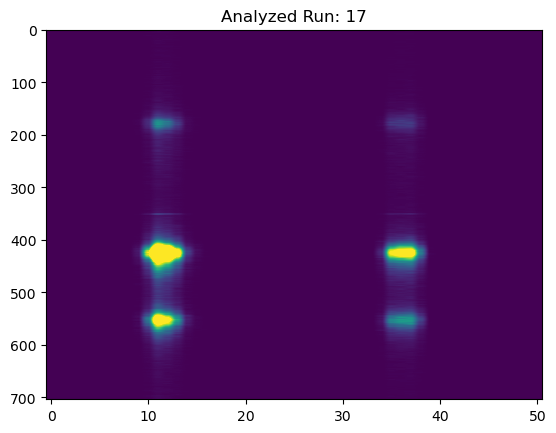

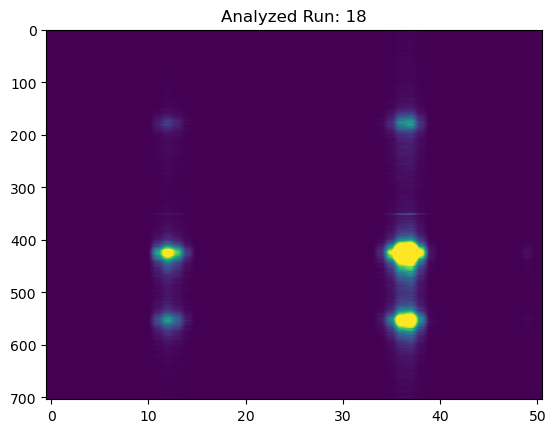

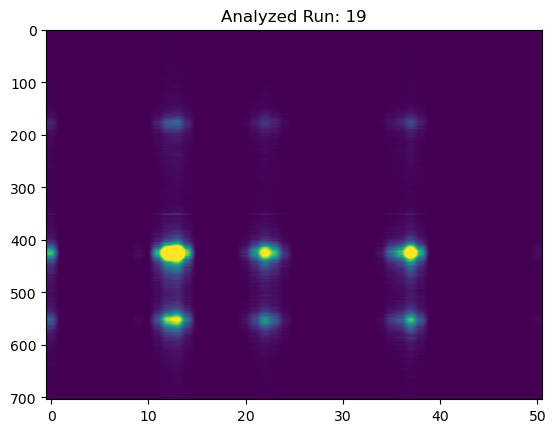

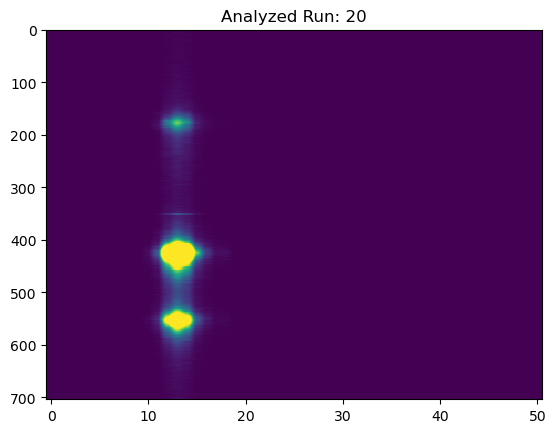

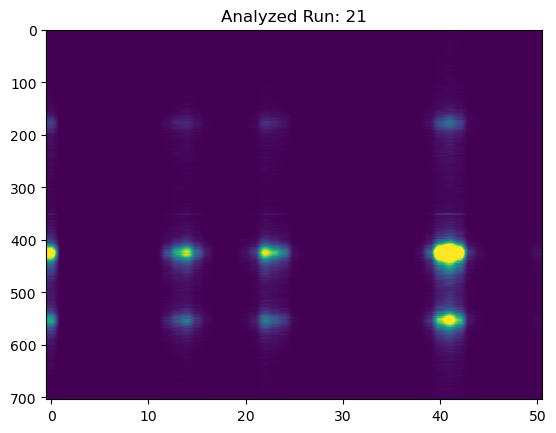

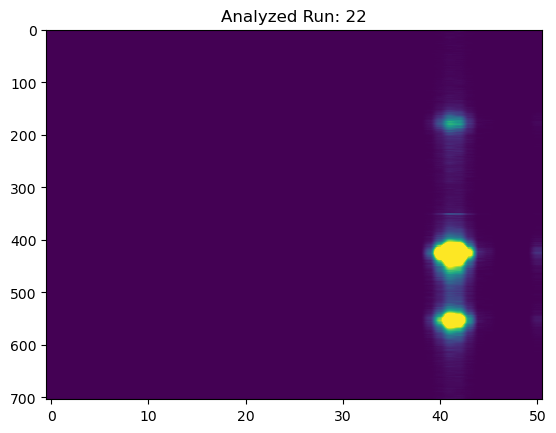

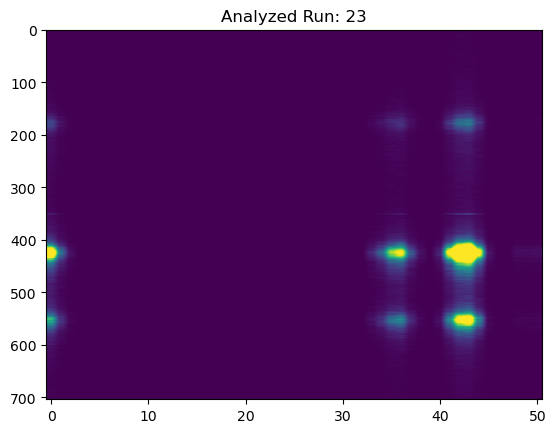

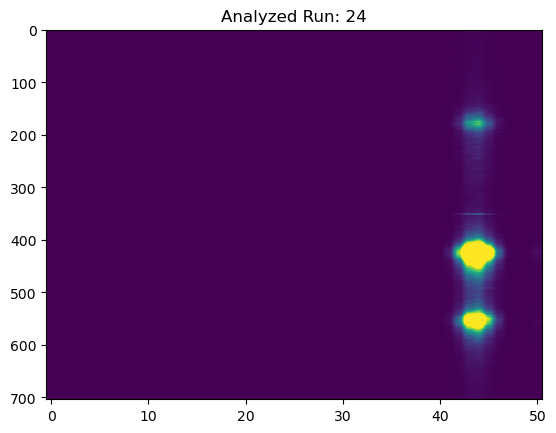

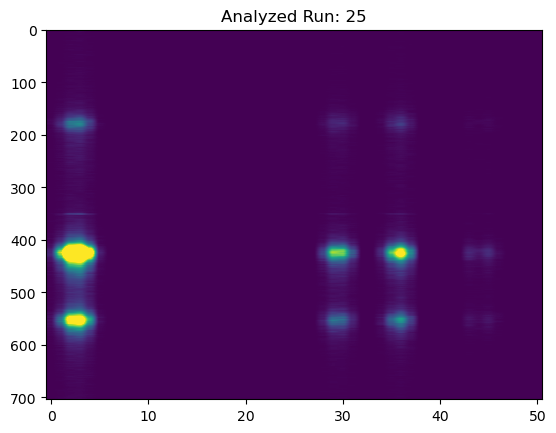

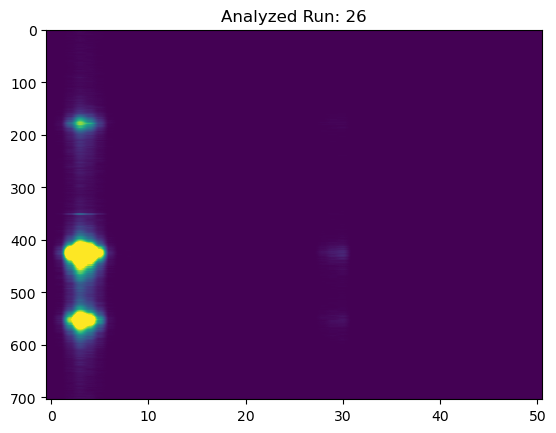

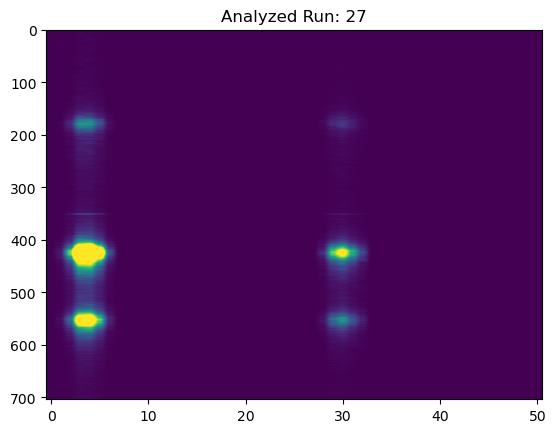

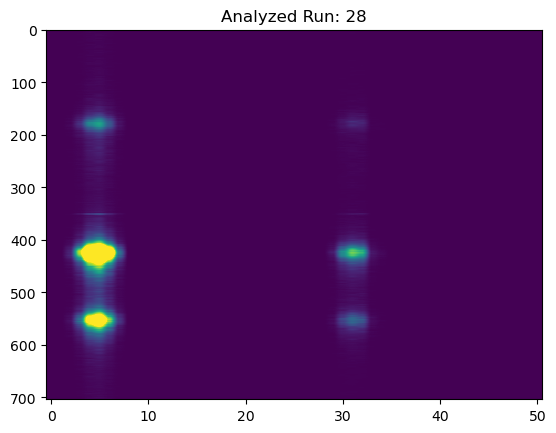

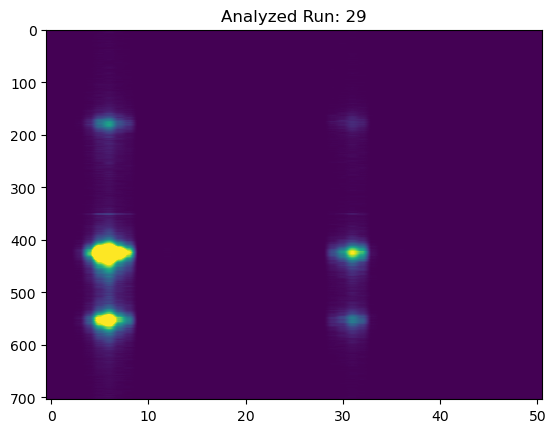

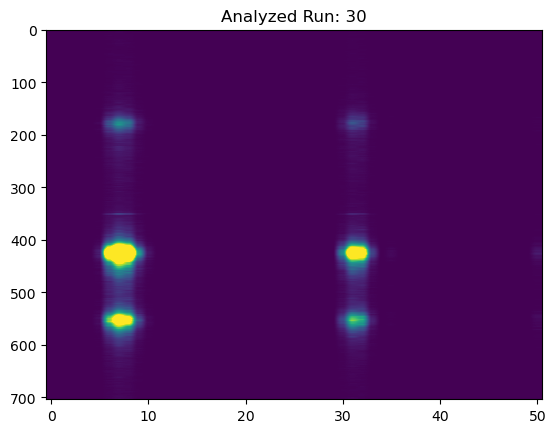

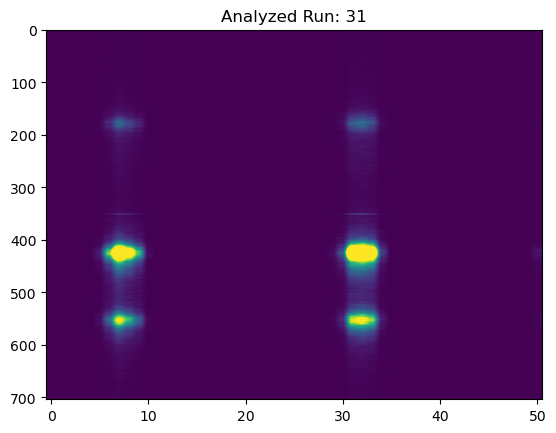

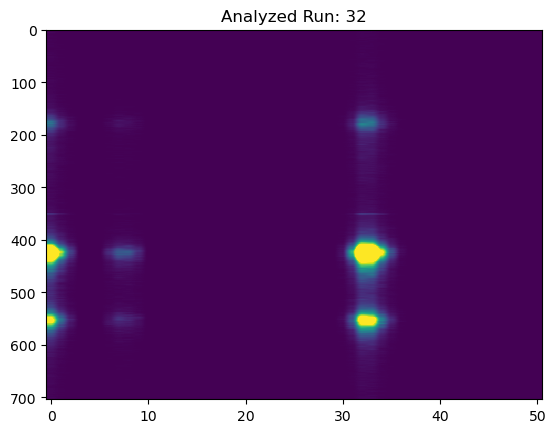

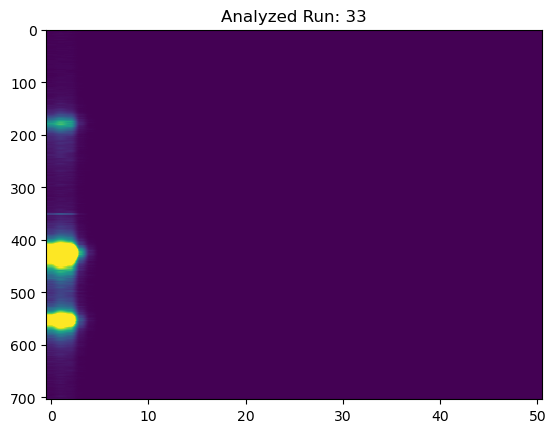

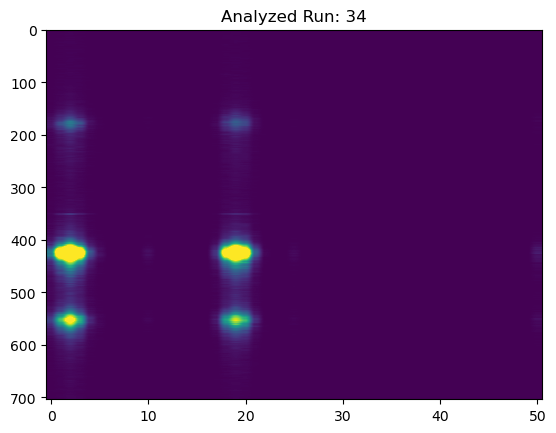

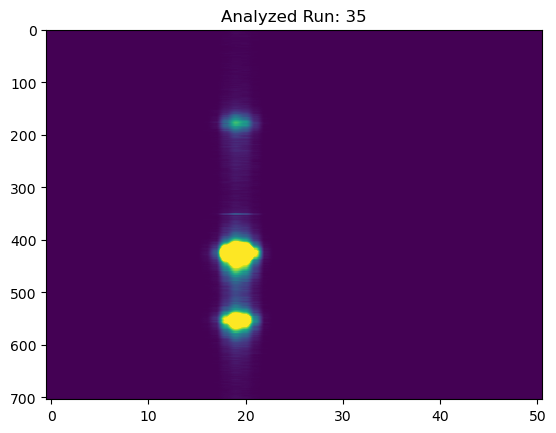

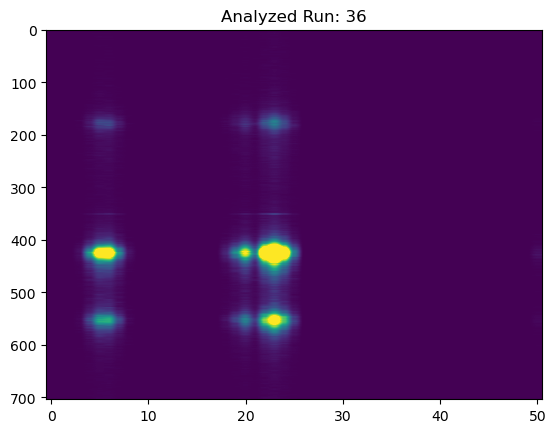

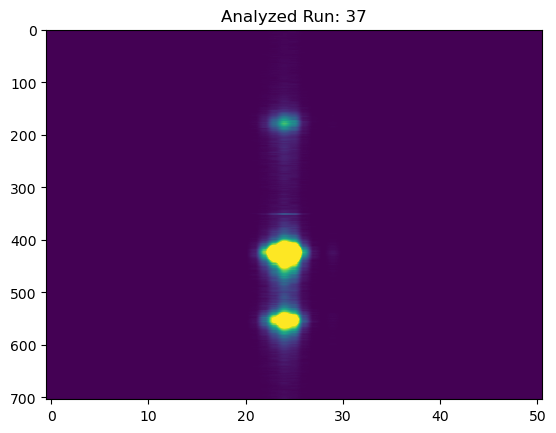

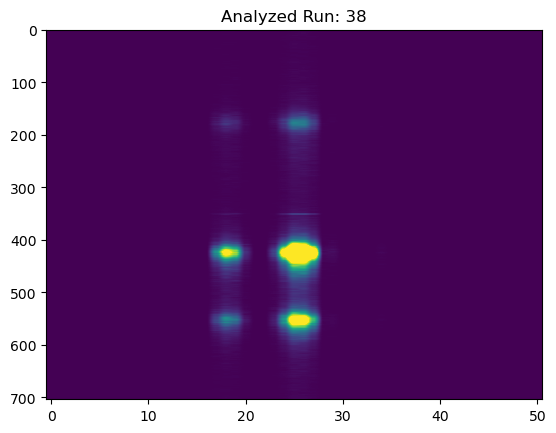

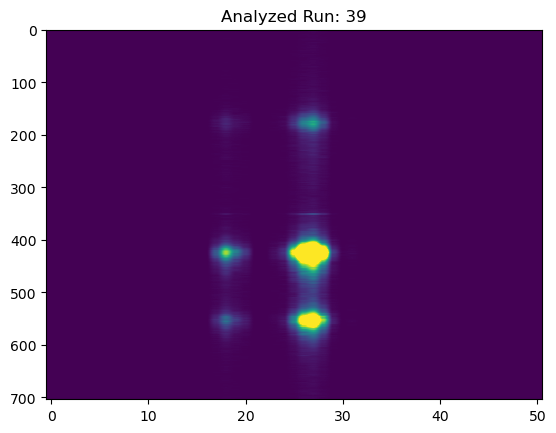

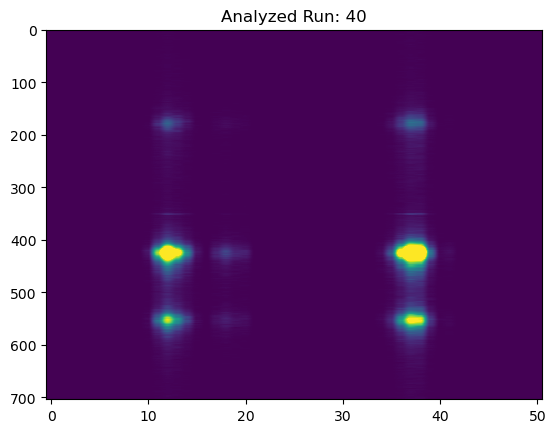

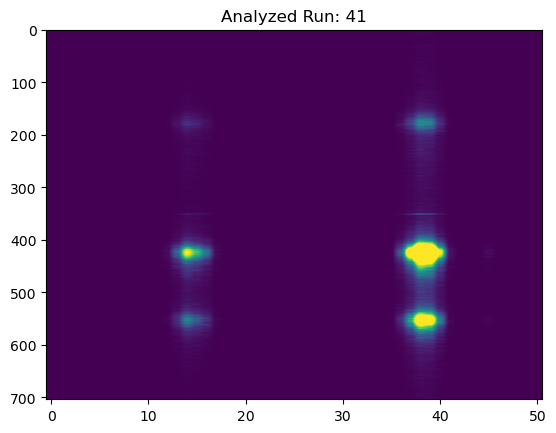

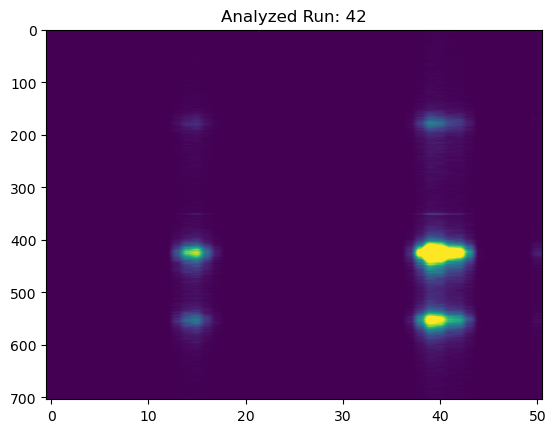

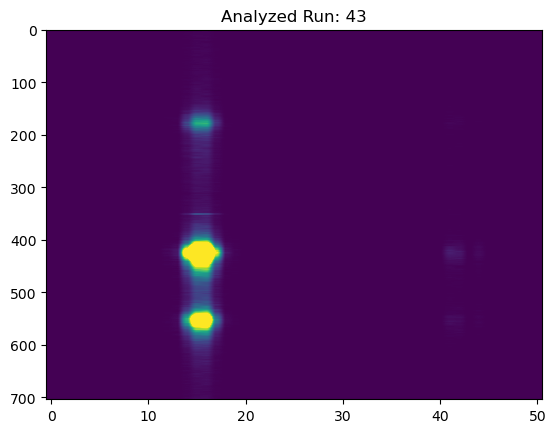

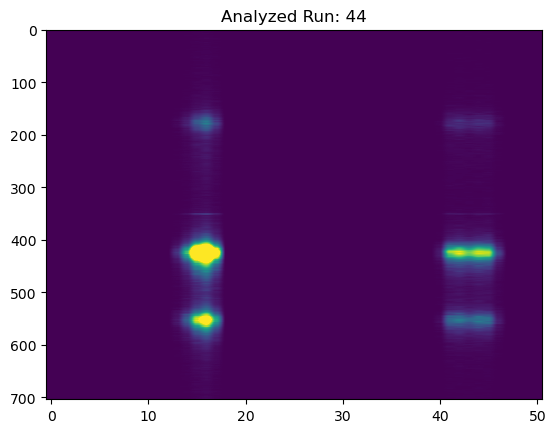

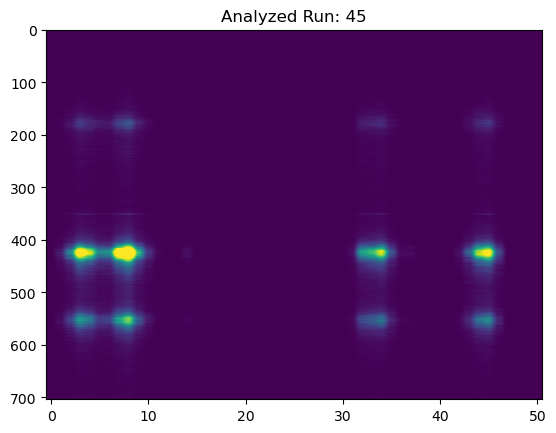

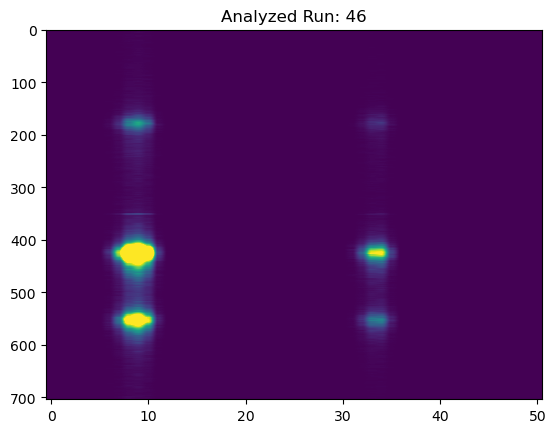

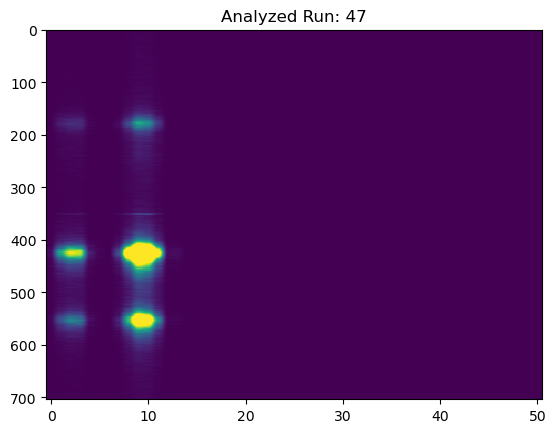

In [69]:
for x in range(len(xes.analyzed_runs)):
    plt.imshow(xes.analyzed_runs[x].epix_simultaneous_laser_time_binned_ROI_1.T, aspect="auto")
    plt.clim(0,2000)
    plt.colorbar
    plt.title("Analyzed Run: "+str(x))
    plt.show()
    

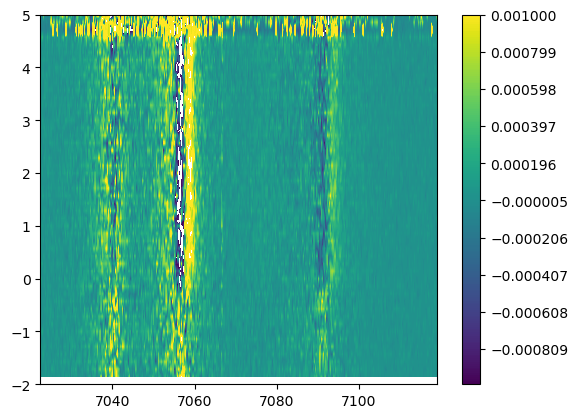

In [5]:
vmin=-0.001
vmax=0.001
plt.contourf(xes.analyzed_runs[0].kbeta_energy, xes.time_bins, xes.difference_spectrum[:-1,:], 
             levels=np.linspace(vmin,vmax,200), vmin=vmin, vmax=vmax)
plt.colorbar()

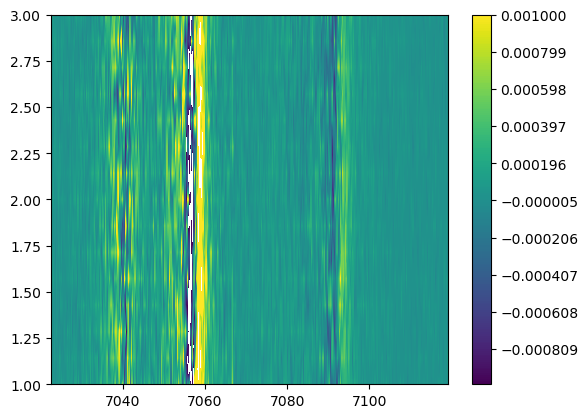

In [6]:
vmin=-0.001
vmax=0.001
plt.contourf(xes.analyzed_runs[0].kbeta_energy, xes.time_bins[21:36], xes.difference_spectrum[21:36,:], 
             levels=np.linspace(vmin,vmax,200), vmin=vmin, vmax=vmax)
plt.colorbar()

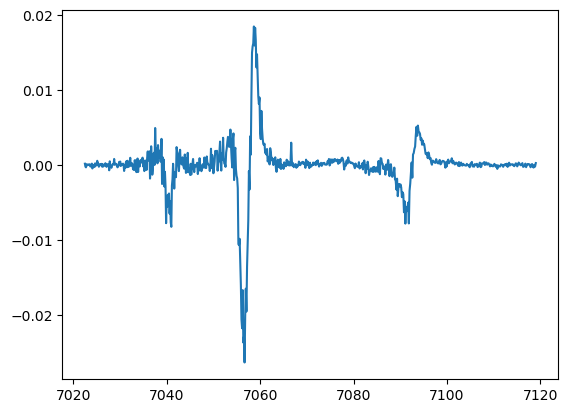

In [7]:
summed_range = np.nansum(xes.difference_spectrum[21:36,:], axis = 0)

plt.plot(xes.analyzed_runs[0].kbeta_energy, summed_range)

In [6]:
off = xes.analyzed_runs[2].epix_xray_not_laser_time_binned_ROI_1 
on = xes.analyzed_runs[2].epix_simultaneous_laser_time_binned_ROI_1

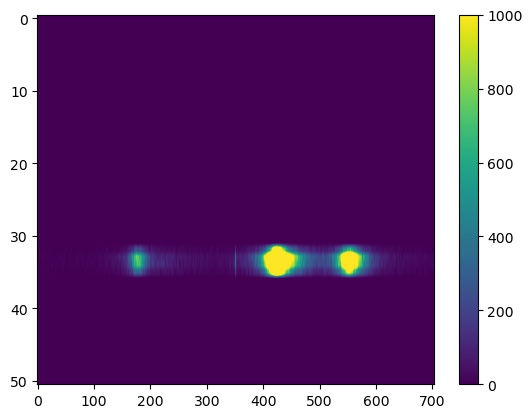

In [7]:
plt.imshow(off, aspect="auto")
plt.clim(0, 1000)
plt.colorbar()

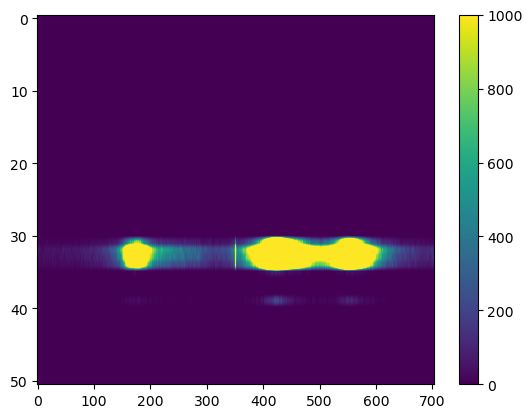

In [8]:
plt.imshow(on, aspect='auto')
plt.clim(0, 1000)
plt.colorbar()

In [9]:
xes.summed_laser_off_normalized

array([[2.75886713e-05, 2.02568235e-05, 7.02613138e-05, ...,
        7.86167357e-05, 2.21243753e-04, 1.97585938e-05],
       [8.94734490e-05, 8.72206970e-05, 2.89603600e-05, ...,
        1.11158013e-04, 2.15169664e-04, 1.27012485e-04],
       [0.00000000e+00, 7.21380471e-05, 5.41647099e-05, ...,
        1.40407069e-04, 6.23010873e-05, 6.50824042e-05],
       ...,
       [6.22152158e-05, 1.59105108e-05, 7.83497444e-05, ...,
        1.62545996e-04, 1.20577830e-04, 9.85084048e-05],
       [3.41983799e-05, 1.62789687e-05, 3.11500208e-05, ...,
        7.32685538e-05, 1.13458745e-04, 1.24815305e-04],
       [2.29477770e-05, 4.46637134e-05, 6.31739554e-05, ...,
        1.18222657e-04, 9.30385552e-05, 1.17919042e-04]])

In [10]:
xes.summed_laser_on_normalized

array([[5.47511967e-05, 5.54427453e-05, 3.09025358e-05, ...,
        1.10410580e-04, 1.16620125e-04, 1.10898183e-04],
       [5.06092325e-05, 4.20798965e-05, 5.15337125e-05, ...,
        8.12137310e-05, 1.05893173e-04, 1.01133546e-04],
       [4.14752199e-05, 5.38522834e-05, 4.92589511e-05, ...,
        1.03044376e-04, 1.00938809e-04, 1.15835025e-04],
       ...,
       [5.55237113e-05, 4.19654046e-05, 3.96066027e-05, ...,
        7.86795083e-05, 8.68059396e-05, 1.16496667e-04],
       [3.66761120e-05, 4.69405146e-05, 2.57605473e-05, ...,
        9.06404672e-05, 1.38822923e-04, 7.96197504e-05],
       [1.87828626e-04, 5.94198824e-05, 0.00000000e+00, ...,
        4.62345799e-05, 2.07857761e-04, 8.31857708e-05]])

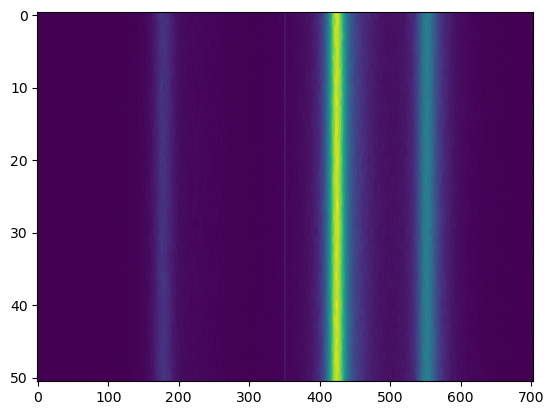

In [11]:
plt.imshow(xes.summed_laser_off_normalized, aspect = 'auto')

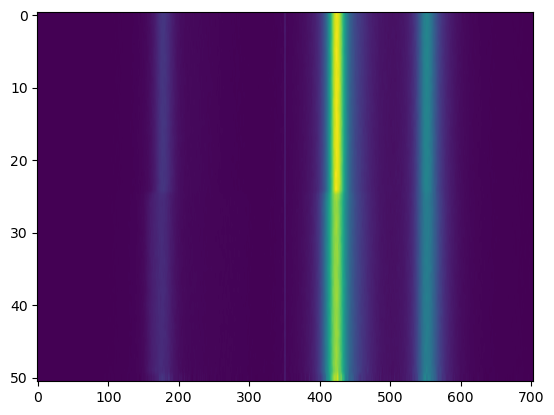

In [12]:
plt.imshow(xes.summed_laser_on_normalized, aspect = 'auto')

## Diagnostics

In [292]:
file_path = '/sdf/data/lcls/ds/mfx/mfx100894224/hdf5/smalldata/mfx100894224_Run0102.h5'

In [293]:
#!ls -lrt /sdf/data/lcls/ds/mfx/mfx100894224/hdf5/smalldata/mfx100894224_Run0043.h5

In [294]:
file = h5py.File(file_path, 'r')

In [295]:
list(file.keys())

['MfxDg1BmMon',
 'MfxDg2BmMon',
 'Sums',
 'UserDataCfg',
 'damage',
 'ebeamh',
 'epics',
 'epics_archiver',
 'epix100',
 'feespec',
 'gasdet',
 'lightStatus',
 'pcav',
 'qadc_ch0',
 'qadc_ch1',
 'scan',
 'timestamp',
 'timing',
 'tt']

In [296]:
def printnames(name):
    print(name)

file.visit(printnames)

MfxDg1BmMon
MfxDg1BmMon/peakAmplitude
MfxDg1BmMon/peakTime
MfxDg1BmMon/totalIntensityJoules
MfxDg1BmMon/xPositionMeters
MfxDg1BmMon/yPositionMeters
MfxDg2BmMon
MfxDg2BmMon/peakAmplitude
MfxDg2BmMon/peakTime
MfxDg2BmMon/totalIntensityJoules
MfxDg2BmMon/xPositionMeters
MfxDg2BmMon/yPositionMeters
Sums
Sums/epix100_calib
Sums/epix100_calib_dropped
Sums/epix100_calib_max
Sums/epix100_calib_thresADU1
Sums/jungfrau_calib
Sums/jungfrau_calib_dropped
Sums/jungfrau_calib_max
Sums/jungfrau_calib_thresADU1
UserDataCfg
UserDataCfg/MfxDg1BmMon
UserDataCfg/MfxDg1BmMon/detname
UserDataCfg/MfxDg1BmMon/name
UserDataCfg/MfxDg2BmMon
UserDataCfg/MfxDg2BmMon/detname
UserDataCfg/MfxDg2BmMon/name
UserDataCfg/ebeamh
UserDataCfg/ebeamh/detname
UserDataCfg/ebeamh/name
UserDataCfg/epics
UserDataCfg/epics/PV_0
UserDataCfg/epics/PV_1
UserDataCfg/epics/PV_2
UserDataCfg/epics/PVname_0
UserDataCfg/epics/PVname_1
UserDataCfg/epics/PVname_2
UserDataCfg/epics/detname
UserDataCfg/epics/name
UserDataCfg/epix100
UserDataCf

In [170]:
laser_status = file['lightStatus/laser']
xray_status = file['lightStatus/xray']

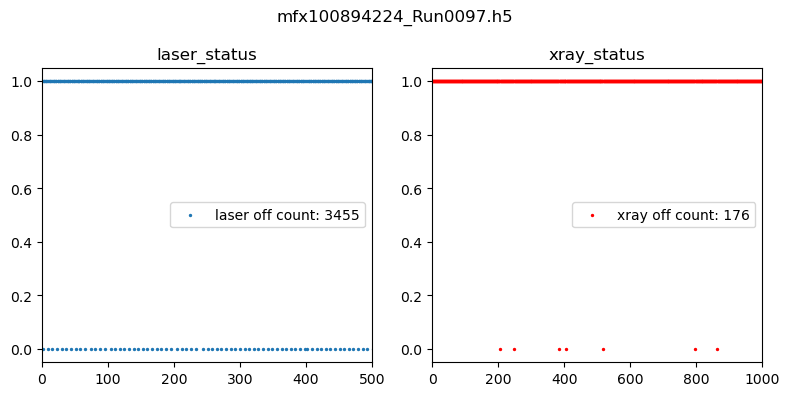

In [179]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
laser_off = len(laser_status) - np.sum(laser_status)
plt.scatter(np.arange(len(laser_status)),laser_status, s=2, label = "laser off count: " + str(laser_off))
plt.xlim(0, 500)
plt.legend()
plt.title("laser_status")

plt.subplot(1, 2, 2)
x_ray_on = np.sum(xray_status) 
x_ray_off = len(xray_status) - np.sum(xray_status) 
plt.scatter(np.arange(len(xray_status)),xray_status, s=2, color = 'r', label = "xray off count: " + str(x_ray_off))
plt.xlim(0, 1000)
plt.title("xray_status")
plt.legend()

plt.suptitle(file_path[-23:])

plt.tight_layout()

In [172]:
lxt_ttc = file['epics/lxt']
lxt_encoder = file['scan/mfx_lxt_fast1']
pulse_id = file['timing/pulseId']
pulse_timestamp = file['timing/timestamp']
tt_ampl = file['tt/ampl']
ipm = file['MfxDg2BmMon/totalIntensityJoules']

In [173]:
data = [ipm, pulse_id, pulse_timestamp, lxt_ttc, lxt_encoder, tt_ampl]

In [174]:
for x in range(len(data)):
    print("DATA: " + str(data[x]))
    print("\t", "MAX: ", np.max(data[x]), "| MIN: ", np.min(data[x]))

DATA: <HDF5 dataset "totalIntensityJoules": shape (24240,), type "<f8">
	 MAX:  669346.75 | MIN:  -3140.0
DATA: <HDF5 dataset "pulseId": shape (24240,), type "<i8">
	 MAX:  1685399206834 | MIN:  1685138657714
DATA: <HDF5 dataset "timestamp": shape (24240,), type "<i8">
	 MAX:  4790277196872766940 | MIN:  4790275990395538212
DATA: <HDF5 dataset "lxt": shape (24240,), type "<f8">
	 MAX:  1.999999998784658e-13 | MIN:  1.9999999903143285e-13
DATA: <HDF5 dataset "mfx_lxt_fast1": shape (24240, 1), type "<f8">
	 MAX:  4.99999903266411e-12 | MIN:  -2.0000236296805266e-12
DATA: <HDF5 dataset "ampl": shape (24240,), type "<f8">
	 MAX:  nan | MIN:  nan


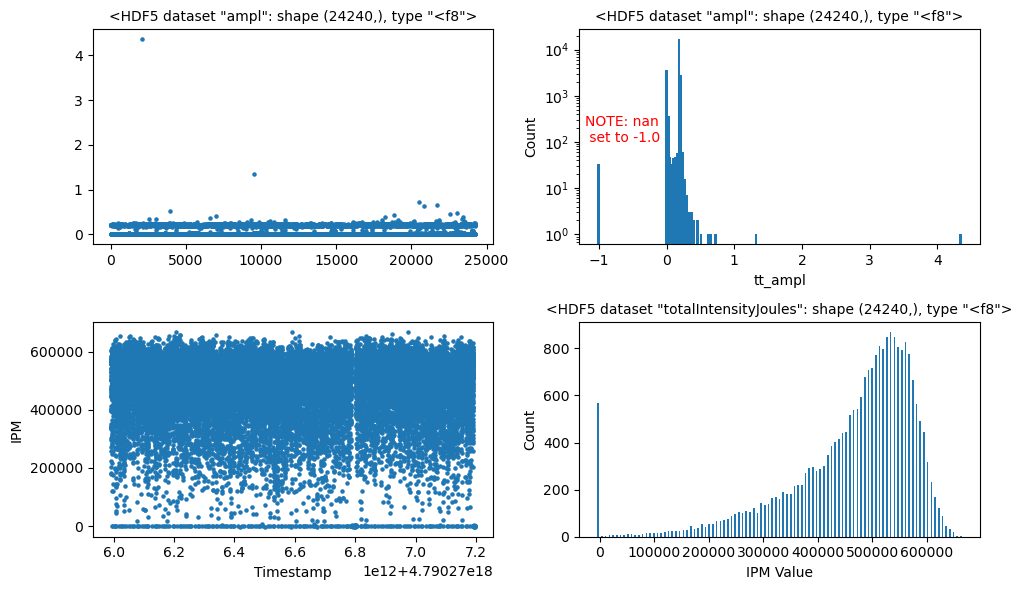

In [175]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.scatter(np.arange(len(lxt_encoder)), tt_ampl, s =5 )
plt.title(str(tt_ampl), fontsize=10)

plt.subplot(2, 2, 2)

## set nans to -1.0
tt_ampl_nan_clean = np.nan_to_num(tt_ampl, nan=-1.0)
ttamphis = np.histogram(tt_ampl_nan_clean, 
                        bins = np.linspace(np.min(tt_ampl_nan_clean), np.max(tt_ampl_nan_clean), 200))
counts, bins = ttamphis

plt.bar(bins[:-1], counts, width=0.04)
plt.yscale('log')
plt.title(str(tt_ampl), fontsize=10)
plt.ylabel('Count')
plt.xlabel('tt_ampl')
plt.text(-1.2, 100, "NOTE: nan \n set to -1.0", c = 'r')



plt.subplot(2, 2, 3)
plt.scatter(pulse_timestamp, ipm, s = 5)
plt.ylabel("IPM")
plt.xlabel("Timestamp")


plt.subplot(2, 2, 4)
ipm_hist = np.histogram(ipm, bins =  np.linspace(np.min(ipm), np.max(ipm), 100))
counts, bins = ipm_hist
#bins
plt.bar(bins[:-1], counts, width=3000)
#plt.yscale('log')
plt.title(str(ipm), fontsize=10)
plt.ylabel('Count')
plt.xlabel('IPM Value')

plt.tight_layout()

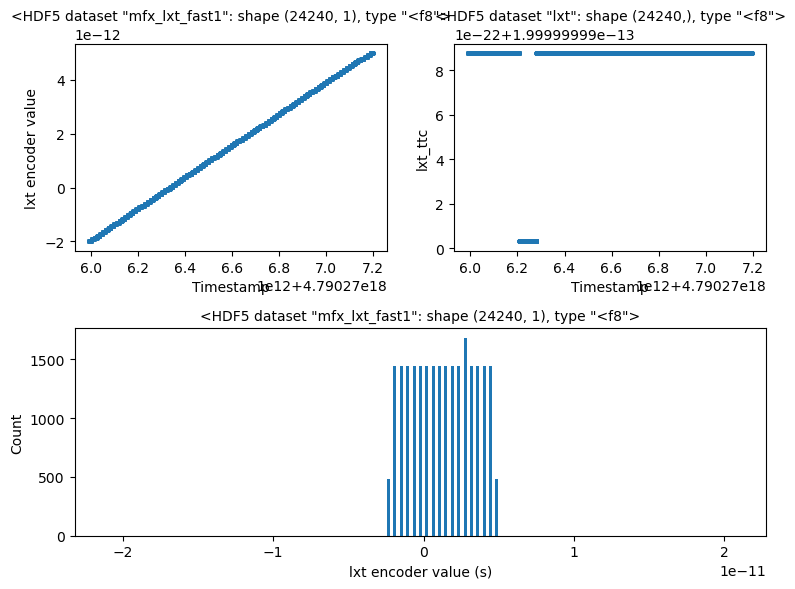

In [177]:
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
plt.scatter(pulse_timestamp, lxt_encoder, s = 5)
plt.ylabel("lxt encoder value")
plt.xlabel("Timestamp")
plt.title(str(lxt_encoder), fontsize=10)

plt.subplot(2, 2, 2)
plt.scatter(pulse_timestamp, lxt_ttc, s =5)
plt.ylabel("lxt_ttc")
plt.xlabel("Timestamp")
plt.title(str(lxt_ttc), fontsize=10)

plt.subplot(2, 2, (3,4))
pico = 1e-12
lxt_encoder_hist = np.histogram(lxt_encoder, bins =  np.linspace(-21*pico, 21*pico, 100))

counts, bins = lxt_encoder_hist
#bins
plt.bar(bins[:-1], counts, width = 2e-13)
plt.ylabel("Count")
plt.xlabel("lxt encoder value (s)")
plt.title(str(lxt_encoder), fontsize=10)
          
plt.tight_layout()

In [347]:
def run_checker(path, runs, extension, key_timestamp, keys, verbose=False):
    for x in keys:
        plt.figure(figsize=(8,4))
        all_data = []
        for y in runs:
            filepath = path + y + extension
            file = h5py.File(filepath, 'r')
            timestamp = file[key_timestamp]
            data = file[x]
            if verbose==True:
                print(filepath)
                print(file)
                print(timestamp)
                print(data)
            plt.scatter(timestamp, data, label = str(file)[25:-14], s = 1)
            plt.ylabel(x)
            plt.xlabel(key_timestamp)
            plt.legend(fontsize=10,bbox_to_anchor=(1.01, 1.00))
        plt.show()

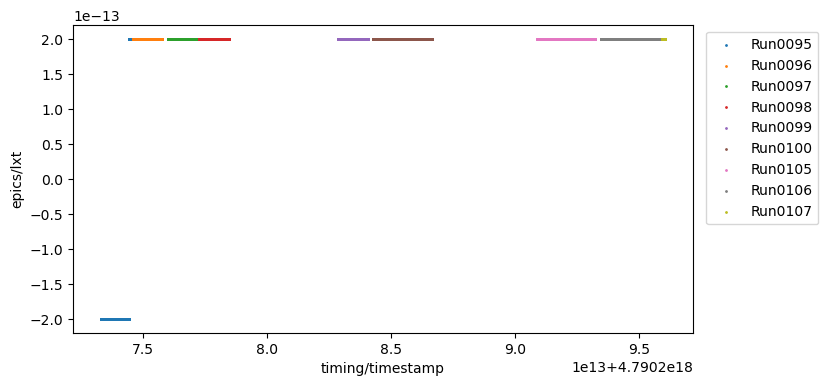

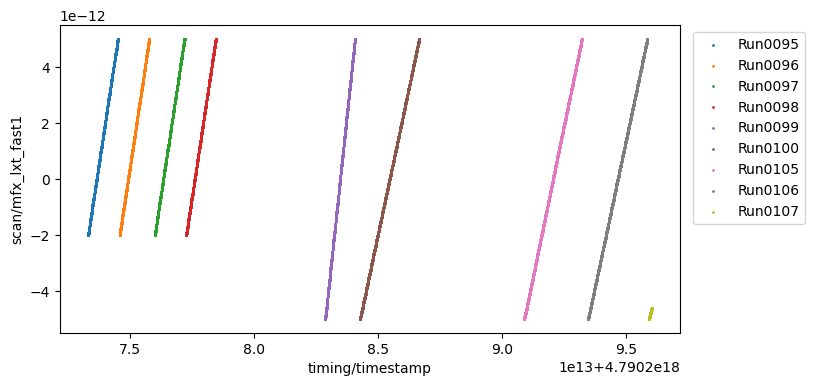

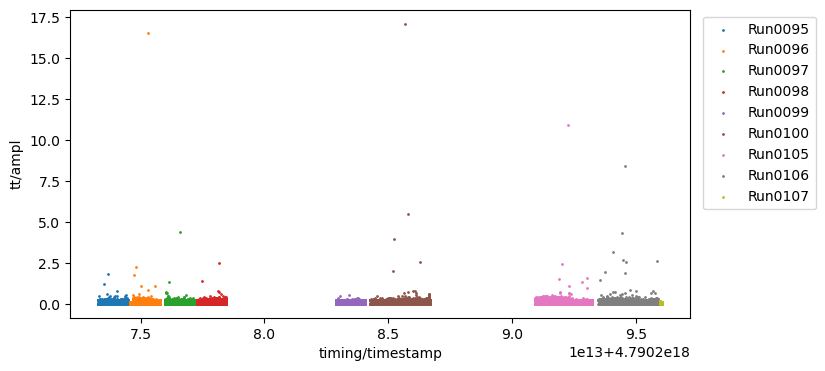

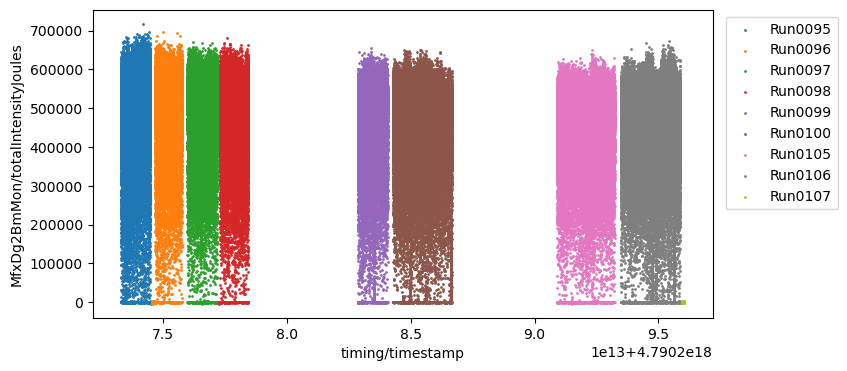

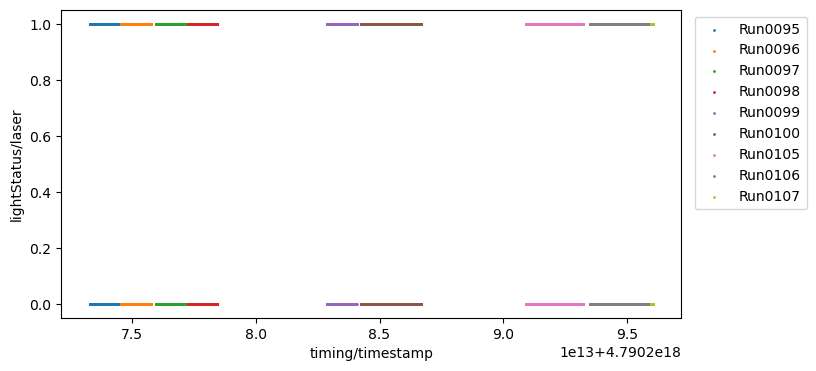

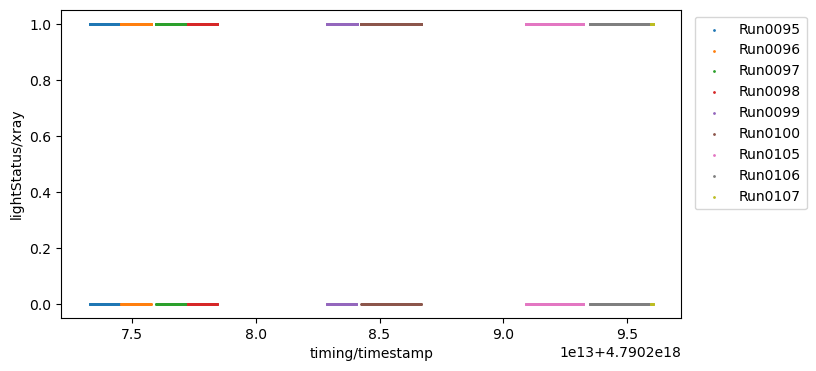

In [348]:
path = '/sdf/data/lcls/ds/mfx/mfx100894224/hdf5/smalldata/mfx100894224_Run'
runs = ['0095', '0096', '0097', '0098', '0099', '0100', '0105', '0106', '0107']
extension = '.h5'
key_timestamp = 'timing/timestamp'
keys = ['epics/lxt', 'scan/mfx_lxt_fast1', 'tt/ampl','MfxDg2BmMon/totalIntensityJoules', 'lightStatus/laser', 'lightStatus/xray']

run_checker(path, runs, extension, key_timestamp, keys)

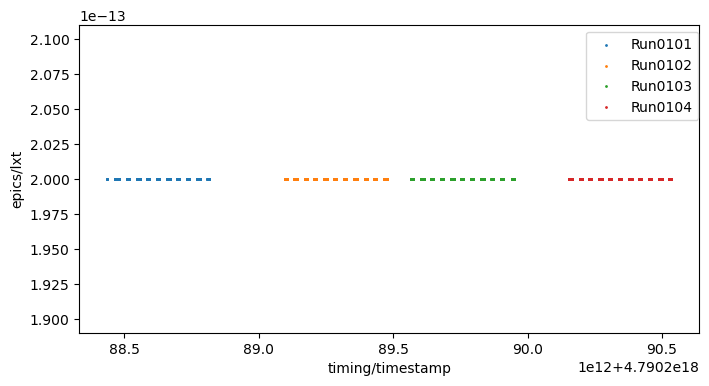

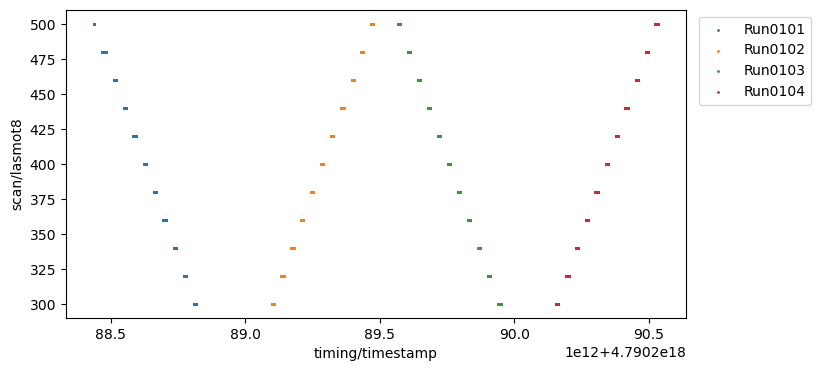

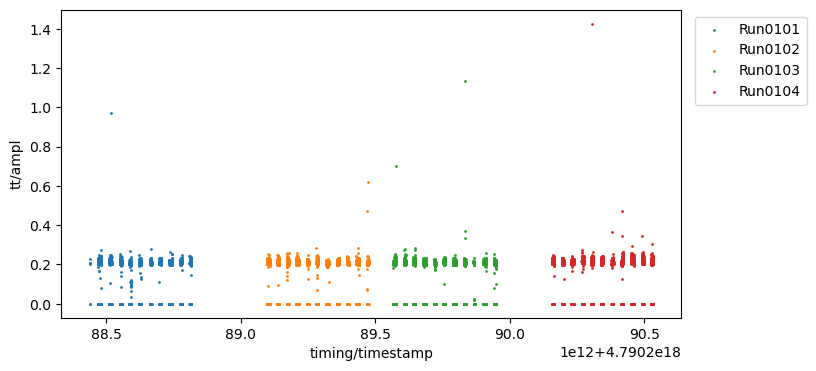

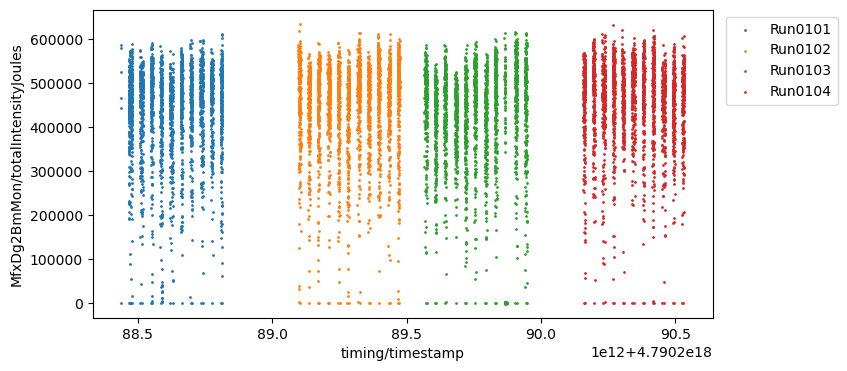

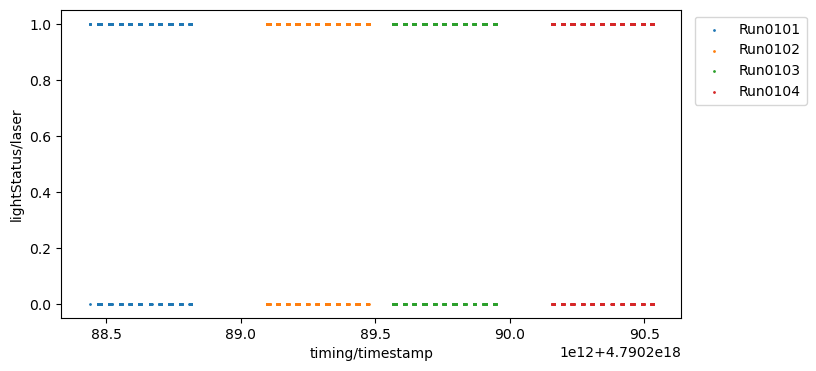

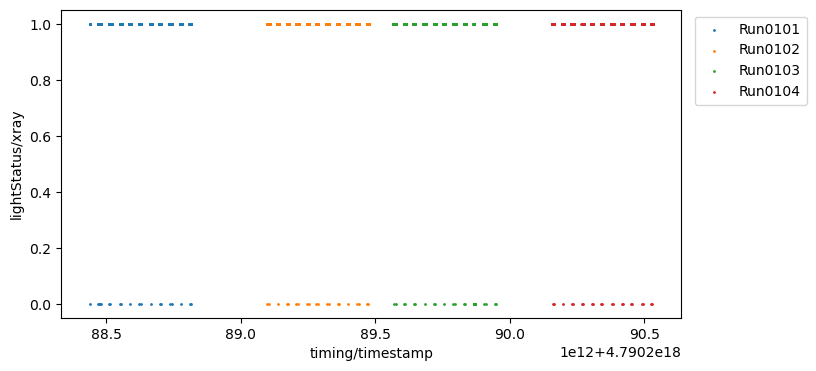

In [349]:
path = '/sdf/data/lcls/ds/mfx/mfx100894224/hdf5/smalldata/mfx100894224_Run'
runs = ['0101', '0102', '0103', '0104']
extension = '.h5'
key_timestamp = 'timing/timestamp'
keys = ['epics/lxt', 'scan/lasmot8', 'tt/ampl','MfxDg2BmMon/totalIntensityJoules', 'lightStatus/laser', 'lightStatus/xray']

run_checker(path, runs, extension, key_timestamp, keys)

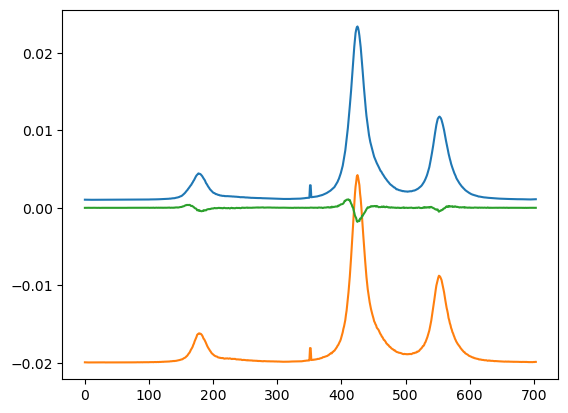

In [25]:
on=np.nanmean(v.summed_laser_on_normalized,axis=0)
off=np.nanmean(v.summed_laser_off_normalized,axis=0)
plt.plot(on+0.001)
plt.plot(off-0.02)
plt.plot(on-off)

Text(0, 0.5, '$\\Delta$ XES')

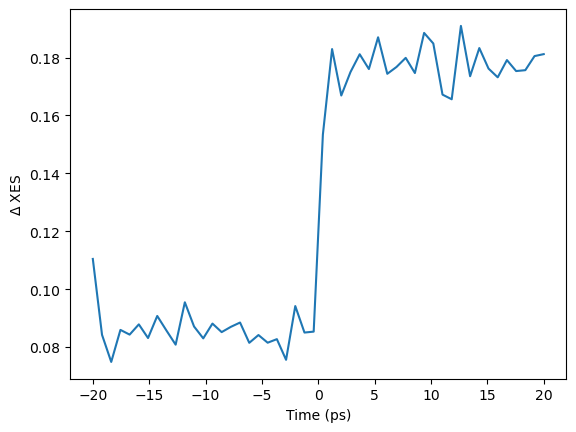

In [26]:
times=np.linspace(xes.mintime,xes.maxtime,xes.numpoints)
diff=np.nansum(np.abs(v.summed_laser_on_normalized-v.summed_laser_off_normalized),axis=1)[:-1]
plt.plot(times,diff)
plt.xlabel('Time (ps)')
plt.ylabel(r'$\Delta$ XES')


In [7]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
times=np.linspace(xes.mintime,xes.maxtime,xes.numpoints)
diff=np.nansum(np.abs(v.summed_laser_on_normalized-v.summed_laser_off_normalized),axis=1)[:-1]
smooth=False
interpolate=False
def error_function(x, a, b, c, d):
    return a * (1 + scipy.special.erf(b * (x - c))) + d

def gaussian(x, amplitude, center, fwhm, offset):
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
    return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2)) + offset
initial_guess = [np.max(diff) - np.min(diff), 1E11, np.mean(times), np.min(diff)]
if interpolate:
    num_interpolated_points = len(times) * 10  # Increase the number of points by a factor of 10
    interpolator = interp1d(times, diff, kind='cubic', fill_value='extrapolate')
    times = np.linspace(times[0], times[-1], num_interpolated_points)
    diff = interpolator(times)

if smooth:
    diff=savgol_filter(diff, window_length=10, polyorder=9)
params, covariance = curve_fit(error_function, times, diff, p0=initial_guess, maxfev=99999999)

fig, axs = plt.subplots(2, 1, sharex=True, dpi=150)
fwhm = np.abs(2 * np.sqrt(2 * np.log(2)) / params[1])
grad = np.gradient(smoothed_diff, times[1] - times[0])
#grad = np.diff(diff) / np.diff(times)

axs[1].plot(times, grad, label='Data Gradient')
axs[0].plot(times, diff, label='Data')
axs[1].set_xlabel('Position')
axs[1].set_ylabel('Intensity')
# axs[0].set_title(f'Wire Scan Run {run}; Fitted FWHM = {fwhm*1000:,.3f} microns')
axs[1].plot(times,  gaussian(times, np.max(np.abs(grad)), params[2], fwhm, 0), label='Gaussian Fit')
axs[1].set_title('Derivative')

# Plot the error function fit
axs[0].plot(times, error_function(times, *params), label='Error Function Fit')
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()

print("Fitted parameters for the error function:")
#print(f"Amplitude (a): {params[0]} - This controls the vertical stretch of the error function.")
#print(f"Slope (b): {params[1]} - This influences the steepness of the transition edge.")
#print(f"Center (c): {params[2]} - This is the horizontal position of the center of the error function.")
#print(f"Offset (d): {params[3]} - This is the vertical offset of the error function.")
print(f"FWHM: {fwhm*1E15} - This is the full width at half maximum of the instrument response function (IRF).")


NameError: name 'scipy' is not defined